# Car Price Prediction - Multiple Regression

This project aims to predict the prices of cars using multiple regression analysis. The dataset used for this project contains information about various characteristics of cars such as car height, car width, rpm, engine size, and more. The goal of this project is to train a model that can accurately predict the price of a car based on its characteristics. The project includes data cleaning and preprocessing, feature selection, model building and evaluation. This project is implemented in Python and the libraries used are Pandas, Numpy, Sklearn, Matplotlib and Seaborn. The results of this project can be useful for car dealerships, manufacturers, and consumers looking to buy or sell a car.

First and foremost, we need to import the necessary libraries.

Numpy - Used for Linear Algebra                                                                                    
Pandas - Used for Data Processing                                                                                    
Matplotlib - Used for plotting relations                                                                            
Seaborn - Additional Data Visualization

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Here, we install the opendataset library,

In [92]:
!pip install jovian opendatasets --upgrade --quiet

For downloading the dataset, we need to specify the dataset URL.

In [14]:
dataset_url = 'https://www.kaggle.com/datasets/hellbuoy/car-price-prediction' 

Now we have the dataset URL and library, we need to download the file.

In [15]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vidhukrishna
Your Kaggle Key: ········


100%|██████████| 18.1k/18.1k [00:00<00:00, 14.0MB/s]

Here, we check the contents of the dataset.

In [16]:
import os

In [17]:
data_dir = './car-price-prediction'

In [18]:
os.listdir(data_dir)

['CarPrice_Assignment.csv', 'Data Dictionary - carprices.xlsx']

Initialising a project name to commit it into jovian.

In [19]:
project_name = 'car-price-predict'

In [20]:
!pip install jovian --upgrade -q

In [21]:
import jovian

In [22]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Creating a new project "vidhumanu24/car-price-predict"
[jovian] Committed successfully! https://jovian.com/vidhumanu24/car-price-predict


'https://jovian.com/vidhumanu24/car-price-predict'

Now first of all, we need to load our dataset into a variable called data.

In [23]:
data = pd.read_csv('./car-price-prediction/CarPrice_Assignment.csv')

Here, we list the first 10 rows of the data to just check what is the data we are dealing with.

In [24]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


# Variable Description

- enginesize - This is the engine size of the car in cubic centimeters
- boreratio - Used to determine the engine's combustion efficiency and power output (A lower bore ratio indicates a longer stroke, while a higher bore ratio indicates a shorter stroke.)
- price - Price of the car in USD

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Here, we describe our data.

In [26]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


- The mean car price is about ＄13277. The standard deviation is about ＄7989, so roughly 68% of prices are between ＄5288 and ＄21266. The min is ＄5118 and the max is ＄45400 so there are outliers in the data.
- The boreratio value indicates the number of low bore ratio cars in this dataset is high, which indicates a longer stroke.
- In general the cars' engines are at least 1200 CC.

# Missing Values

It is important to check and remove missing values from our dataset to get an accurate model.

In [29]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [30]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

We conclude there is no missing data in our dataset, so we are good to go.

In [68]:
plt.style.use("seaborn-darkgrid")

# Outlier Detection

To train our model the best we can, we must determine outliers in the data, which are points that do not follow the general trend of the data, if there is one. These points may increase the overfitting error of our model and make it less accurate in general.

In [93]:
dataset = data.select_dtypes(include = ["float64","int64"])
columns = ['enginesize','boreratio','price']

Here, we create a boxplot for each column.

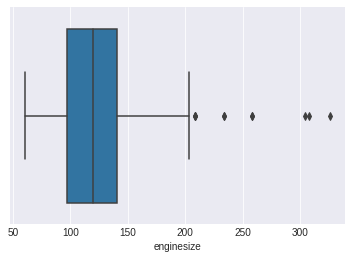

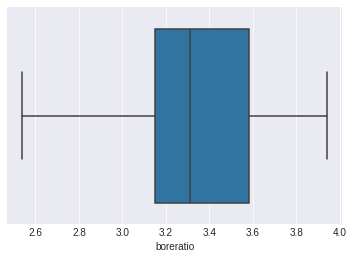

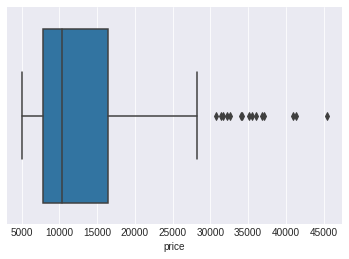

In [94]:
for i in columns:
    sns.boxplot(x=dataset[i])
    plt.xlabel(i)
    plt.show()

Here, Bore Ratio does not have any outliers, and Engine Size and Price outliers are very small so it can be neglected.

# Linear Regression

First of all, we use linear regression to model our data. We use plots to try and find a linear correlation between two variables.

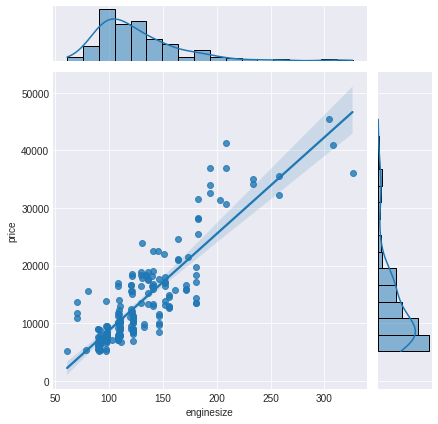

In [95]:
sns.jointplot(x="enginesize",y="price",data=data,kind="reg")
plt.show()

Here, we can understand that cars with lower engine size tends to go for lower prices and vice versa.

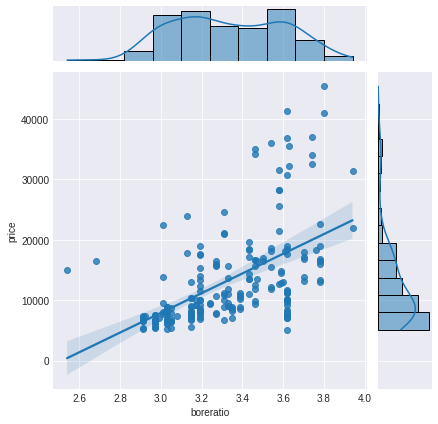

In [96]:
sns.jointplot(x="boreratio",y="price",data=data,kind="reg")
plt.show()

Here, we can justify that almost all car models have bore ratio between 3 and 4.

Now we need to import necessary packages for performing linear regression.

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Initializing independent and target variable,

In [98]:
x = data['enginesize'].values.reshape(-1,1)
y = data['price']

Initialize training and testing for both variables,

In [99]:
var1Train, var1Test, var2Train, var2Test = train_test_split(x,y,test_size=0.2,random_state=1)

Fitting data into a linear regression model,

In [120]:
linreg = LinearRegression()

In [101]:
model = linreg.fit(var1Train,var2Train)

Linear Regression predictions for independent variable,

In [102]:
predictions = linreg.predict(var1Test)

Model Intercept, Coefficient and R Squared values are found,

In [103]:
print("intercept: ", model.intercept_)
print("coefficient: ", model.coef_)
print("r: ", model.score(var1Test,var2Test))

intercept:  -8023.61375536714
coefficient:  [167.45031805]
r:  0.7072521513680088


Plotting the predicted and actual value,

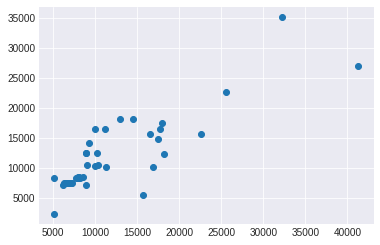

In [104]:
plt.scatter(var2Test, predictions)
plt.show()

A positive linear correlation can be observed between the tests of the different variables.

Finding out different metrics,

In [105]:
print('MAE:', metrics.mean_absolute_error(var2Test, predictions))
print('MSE:', metrics.mean_squared_error(var2Test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(var2Test, predictions)))

MAE: 2629.0075607926806
MSE: 16086648.669114372
RMSE: 4010.816459165686


Plotting a linear correlation between enginesize and price,

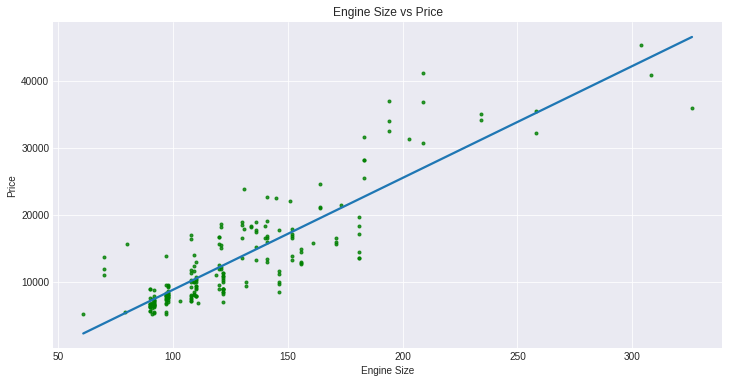

In [123]:
plt.figure(figsize=(12,6))
g = sns.regplot(x=data['enginesize'],y=data["price"],ci=None,scatter_kws = {'color':'g','s':9})
g.set_title("Engine Size vs Price")
g.set_ylabel("Price")
g.set_xlabel('Engine Size')
plt.show()

Same for boreratio and price,

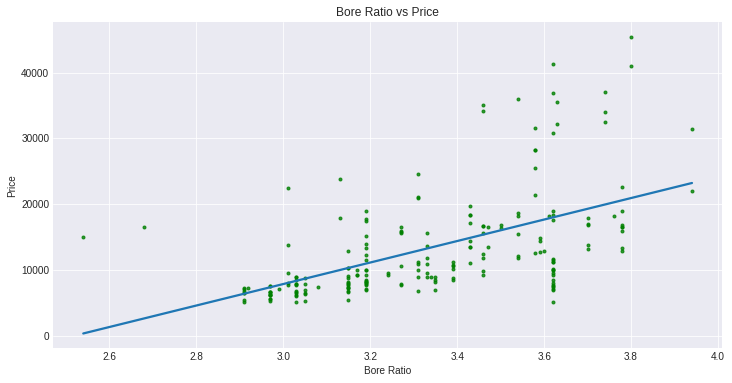

In [124]:
plt.figure(figsize=(12,6))
g = sns.regplot(x=data['boreratio'],y=data["price"],ci=None,scatter_kws = {'color':'g','s':9})
g.set_title("Bore Ratio vs Price")
g.set_ylabel("Price")
g.set_xlabel('Bore Ratio')
plt.show()

# Multiple Linear Regression

To get a better understanding of how engine size and bore ratio affect the price of the car, we will make a 3 dimensional graph with both engine size and horsepower acting to predict price.

Assigning independent and dependent variables,

In [109]:
x = dataset[['enginesize', 'boreratio']]
y = dataset['price']

Splitting the data into training and testing data,

In [110]:
var1Train, var1Test, var2Train, var2Test = train_test_split(x,y,test_size=0.2,random_state=1)

Running regression and making predictions,

In [111]:
linreg = LinearRegression()

In [112]:
model = linreg.fit(var1Train,var2Train)

In [113]:
predictions = linreg.predict(var1Test)

In [114]:
print("intercept: ", model.intercept_)
print("coefficient of each independent variable: ", model.coef_)
print("r: ", model.score(var1Test,var2Test))

intercept:  -13582.084681678669
coefficient of each independent variable:  [ 160.77673951 1922.72838299]
r:  0.7101980986413532


Determining how close is the regression,

In [115]:
print('MAE:', metrics.mean_absolute_error(var2Test, predictions))

MAE: 2529.6158473903765


# Predicting the price

In [119]:
predictedprice = model.predict([[130,4.37]])
print("predicted price for 1300 CC, 4.37 Bore Ratio is", predictedprice, "US Dollars.")

predicted price for 1300 CC, 4.37 Bore Ratio is [15721.21448776] US Dollars.


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [121]:
import jovian

In [122]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vidhumanu24/car-price-predict" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/vidhumanu24/car-price-predict


'https://jovian.com/vidhumanu24/car-price-predict'

# Conclusion

A larger engine size and a lower bore ratio drive up the price of the car. The engine size has a greater coefficient than bore ratio. If I were to do this again, I might try with a larger, more broad data set for more accurate and encompassing results. I would also use more than 3 different variables for comparison. The biases and shortcomings include the fact that the dataset is not that big, compared to something a professional company might use for the same purpose. A dataset that includes thousands of cars from almost every car manufacturer worldwide and many more variables such as where the car was manufactured, what country it was sold in, its tires, its rims, struts and suspension, etc. would probably be a lot more accurate and able to be used on a much more widely-ranged set of cars

In [125]:
import jovian

In [126]:
jovian.commit(project = project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vidhumanu24/car-price-predict" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/vidhumanu24/car-price-predict


'https://jovian.com/vidhumanu24/car-price-predict'